In [9]:
#!pip install matplotlib

!pip3 install matplotlib



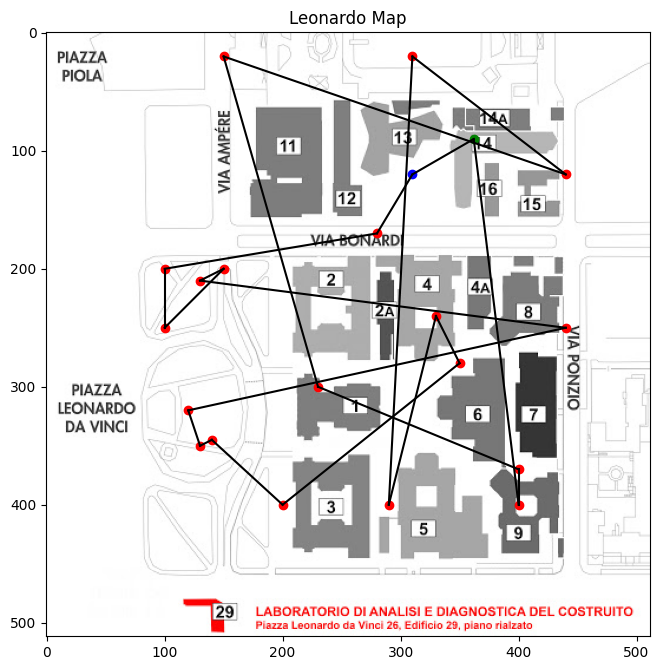

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

img=plt.imread("poli_mappa.jpg")
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.title("Leonardo Map") 

positions = [[362,90],[310,120],[280,170],[100,200],[100,250],[150,200],[130,210],[440,250],[120,320],[130,350],[140,345],[200,400],[350,280],[330,240],[290,400],[310,20],
            [440,120],[150,20],[230,300],[400,370],[400,400],[362,90]]


# visualizza il percorso del drone che può muoversi ovunque
def trajectory(pos):
    x = [item[0] for item in pos]
    y = [item[1] for item in pos]
    plt.plot(x[2:-1], y[2:-1], 'ro') 
    plt.plot(x[1],y[1],'bo')
    plt.plot(x[0],y[0],'go')
    for i in range(1,len(pos)):
        x1,x2 = pos[i][0], pos[i-1][0]
        y1,y2 = pos[i][1], pos[i-1][1]
        plt.plot([x1,x2],[y1,y2],'k-')

# visualizza il percorso del drone che può muoversi solo in linea retta
def trajectory_MAE(pos):
    x = [item[0] for item in pos]
    y = [item[1] for item in pos]
    plt.plot(x[2:-1], y[2:-1], 'ro') 
    plt.plot(x[1],y[1],'bo')
    plt.plot(x[0],y[0],'go')
    for i in range(1,len(pos)):
        x1,x2 = pos[i][0], pos[i-1][0]
        y1,y2 = pos[i][1], pos[i-1][1]
        plt.plot([x1,x1],[y1,y2],'k-')
        plt.plot([x1,x2],[y2,y2],'k-')

trajectory(positions)
plt.imshow(img)
# visualizza l'immagine

In [11]:
def MSE(positions):
    mse=0
    n=len(positions)
    for i in range(1,n):
        mse+= (positions[i][0]-positions[i-1][0])**2+(positions[i][1]-positions[i-1][1])**2
    return mse*(1/n)



def  MAE(positions):
    mae=0
    n=len(positions)
    for i in range(1,n):
        mae +=abs( positions[i][0]-positions[i-1][0])+ abs(positions[i][1]-positions[i-1][1])
    return mae*(1/n)


In [12]:
def performance(pos,metrics):
    loss = metrics(pos)
    return(loss)
    
print(f"MSE = {performance(positions,MSE)}")
print(f"MAE = {performance(positions, MAE)}")

MSE = 36818.09090909091
MAE = 181.36363636363637


In [13]:
import random
class Random_Optimizer:
    def __init__(self, positions):
        self.positions = positions
        self.schedule = [positions[0]]

    def scheduler(self):
        mischia_lista = self.positions[:]
        for i in range(len(mischia_lista)-2,1,-1):
            j = random.randint(1,i)
            mischia_lista[i], mischia_lista[j] = mischia_lista[j], mischia_lista[i]
        self.schedule = mischia_lista[:]
        self.schedule.append(self.schedule[0])
        return self.schedule

    def plot(self):
        img=plt.imread("poli_mappa.jpg")
        fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
        plt.title("Leonardo Map") 
        x = [item[0] for item in self.schedule]
        y = [item[1] for item in self.schedule]
        plt.plot(x[2:-1], y[2:-1], 'ro') 
        plt.plot(x[1],y[1],'bo')
        plt.plot(x[0],y[0],'go')
        for i in range(1,len(self.schedule)):
            x1,x2 = self.schedule[i][0], self.schedule[i-1][0]
            y1,y2 = self.schedule[i][1], self.schedule[i-1][1]
            plt.plot([x1,x2],[y1,y2],'k-')

    def plot_MAE(self):
        img=plt.imread("poli_mappa.jpg")
        fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
        plt.title("Leonardo Map")      
        x = [item[0] for item in self.schedule]
        y = [item[1] for item in self.schedule]
        plt.plot(x[2:-1], y[2:-1], 'ro') 
        plt.plot(x[1],y[1],'bo')
        plt.plot(x[0],y[0],'go')
        for i in range(1,len(self.schedule)):
            x1,x2 = self.schedule[i][0], self.schedule[i-1][0]
            y1,y2 = self.schedule[i][1], self.schedule[i-1][1]
            plt.plot([x1,x1],[y1,y2],'k-')
            plt.plot([x1,x2],[y2,y2],'k-')

Primo drone: Percorso di base peggiore di quello casuale
Secondo drone: Percorso di base migliore di quello casuale


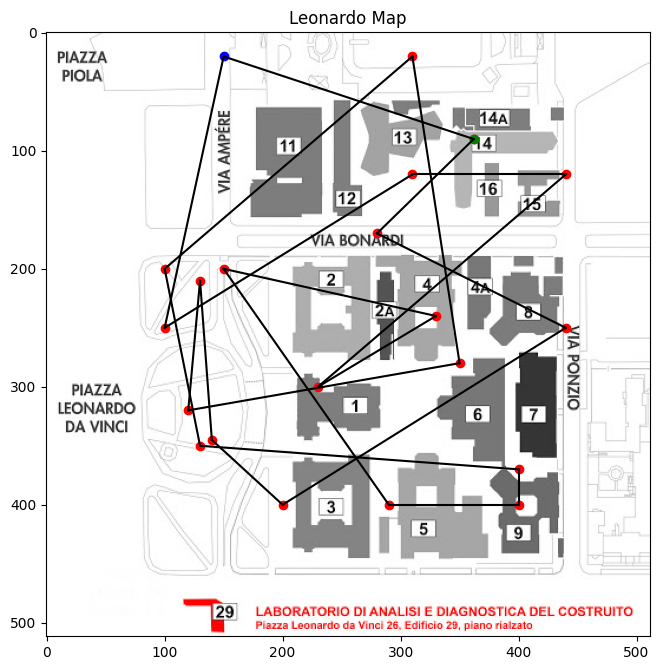

In [14]:
opt=Random_Optimizer(positions)
percorso=opt.scheduler()
opt.plot()

if MSE(positions)>MSE(percorso):
    print ("Primo drone: Percorso di base peggiore di quello casuale")
elif MSE(positions)<MSE(percorso):
    print ("Primo drone: Percorso di base migliore di quello casuale")  
else:
    print ("Primo drone: Percorso di base ha lo stesso MSE di quello casuale")
if MAE(positions)>MAE(percorso):
    print ("Secondo drone: Percorso di base peggiore di quello casuale")
elif MAE(positions)<MAE(percorso):
    print ("Secondo drone: Percorso di base migliore di quello casuale")  
else:
    print ("Secondo drone: Percorso di base ha lo stesso MSE di quello casuale")
plt.imshow(img)        
    


In [15]:
def minimolista(posizioni, punto, metrica):
    new = posizioni[0]
    index = 0
    for i in range(len(posizioni)):
        if metrica([punto,posizioni[i]]) < metrica([punto,new]):
            new = posizioni[i]
            index = i   
    return new, index

In [16]:
class Greedy_Optimizer(Random_Optimizer):
    def __init__(self, positions, loss):
        super().__init__(positions) # non toccare, uso il constructor della classe padre
        self.loss = loss
        
    def scheduler(self):
        listanew = self.positions[1:-1]
        while len(listanew) > 0:
            [new,index] = minimolista(listanew,self.schedule[-1],self.loss)
            listanew.pop(index)
            self.schedule.append(new)
        self.schedule.append(self.schedule[0])
        return self.schedule

MSE pari a 12490.818181818182
MAE pari a 107.0


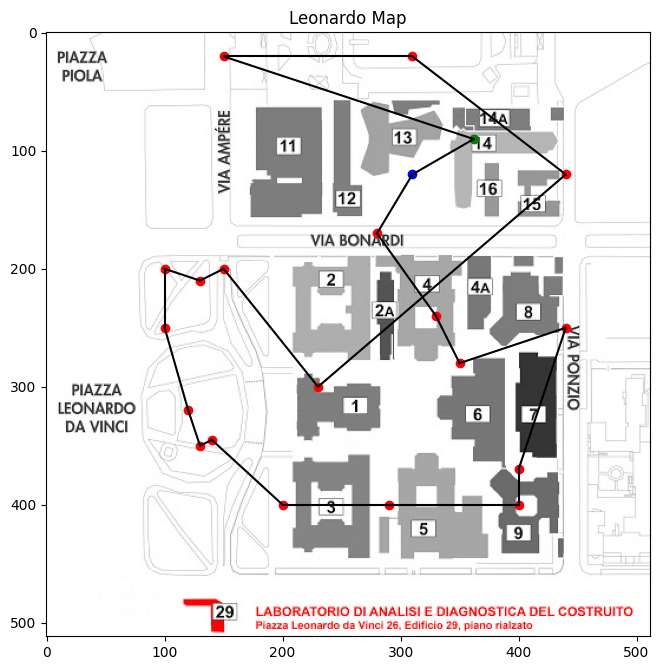

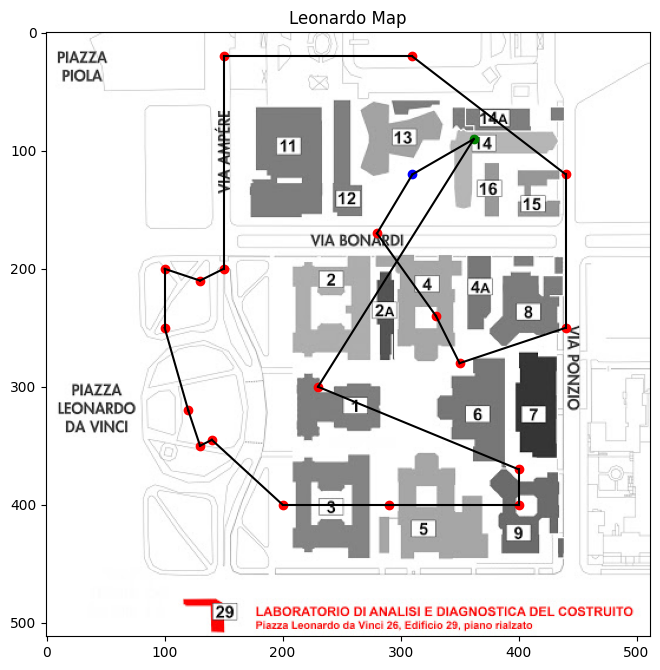

In [17]:
oggetto1 = Greedy_Optimizer(positions,MSE)
a = oggetto1.scheduler()
oggetto1.plot()
print(f"MSE pari a {performance(oggetto1.schedule,MSE)}")
plt.imshow(img)

oggetto2 = Greedy_Optimizer(positions,MAE)
a = oggetto2.scheduler()
oggetto2.plot()
print(f"MAE pari a {performance(oggetto2.schedule, MAE)}")
plt.imshow(img)

Performance of Random_Opt = 44192.086956521736
Performance of Initial schedule = 36818.09090909091
Performance of Greedy_Opt = 12490.818181818182


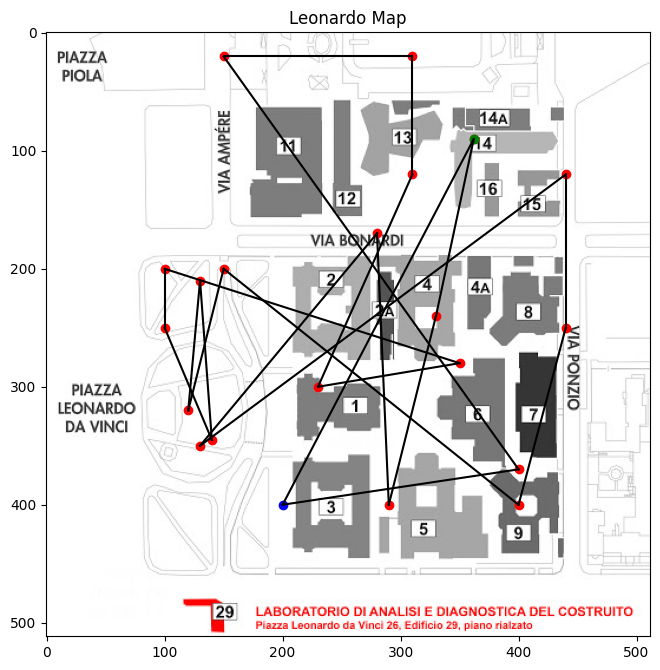

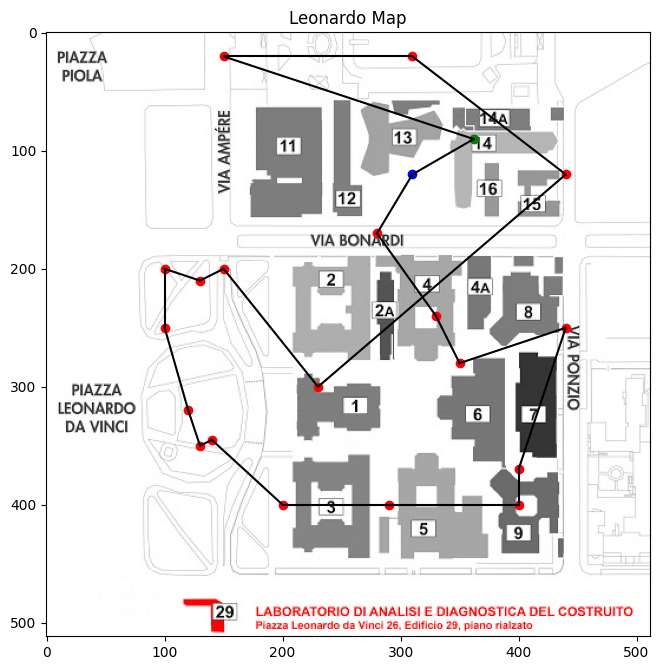

In [18]:
random.seed(0)

metrics = MSE

D1 = Random_Optimizer(positions)
D2 = Greedy_Optimizer(positions, MSE)
first_path  = D1.scheduler()
second_path = D2.scheduler()


print(f"Performance of Random_Opt = {performance(D1.schedule, metrics)}")
print(f"Performance of Initial schedule = {performance(positions, metrics)}")
print(f"Performance of Greedy_Opt = {performance(D2.schedule, metrics)}")


D1.plot()
plt.imshow(img)

D2.plot()
plt.imshow(img)


In [19]:
metrics = MSE
D1 = Random_Optimizer(positions)
D2 = Greedy_Optimizer(positions, metrics)

%timeit performance(D1.scheduler(), metrics)
%timeit performance(D2.scheduler(), metrics)

10000 loops, best of 3: 39.7 µs per loop
1000 loops, best of 3: 25.5 ms per loop
